In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install face_recognition

In [ ]:
import random
import numpy as np
import torch

# Set random seeds for reproducibility
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.cuda.set_device(0)


In [ ]:
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_video_folder = '/content/drive/My Drive/finalreview_trainvideos/*.mp4'
valid_video_folder = '/content/drive/My Drive/finalreview_testvideos/*.mp4'

train_video_files = glob.glob(train_video_folder)
valid_video_files = glob.glob(valid_video_folder)

print("Total no of training videos:", len(train_video_files))
print(train_video_files)

print("Total no of testing videos:", len(valid_video_files))
print(valid_video_files)

# Process training videos
count = 0
for i in train_video_files:
    try:
        count += 1
        validate_video(i, train_transforms)
    except:
        print("Number of training videos processed:", count, "Remaining:", (len(train_video_files) - count))
        print("Corrupted video is:", i)
        continue

# Process testing videos
count = 0
for i in valid_video_files:
    try:
        count += 1
        validate_video(i, train_transforms)
    except:
        print("Number of testing videos processed:", count, "Remaining:", (len(valid_video_files) - count))
        print("Corrupted video is:", i)
        continue

Total no of training videos: 392
['/content/drive/My Drive/finalreview_trainvideos/xarfrtqenk.mp4', '/content/drive/My Drive/finalreview_trainvideos/znlzegqkbp.mp4', '/content/drive/My Drive/finalreview_trainvideos/zpompmamlx.mp4', '/content/drive/My Drive/finalreview_trainvideos/mfplnxyqda.mp4', '/content/drive/My Drive/finalreview_trainvideos/ealzrkfkvs.mp4', '/content/drive/My Drive/finalreview_trainvideos/mcinjivitc.mp4', '/content/drive/My Drive/finalreview_trainvideos/hqzljwdfwm.mp4', '/content/drive/My Drive/finalreview_trainvideos/zqpvuvftex.mp4', '/content/drive/My Drive/finalreview_trainvideos/xfwedambmd.mp4', '/content/drive/My Drive/finalreview_trainvideos/mxyjycdvkk.mp4', '/content/drive/My Drive/finalreview_trainvideos/romnwzacmp.mp4', '/content/drive/My Drive/finalreview_trainvideos/qmkihvyqmj.mp4', '/content/drive/My Drive/finalreview_trainvideos/qplghdvrkz.mp4', '/content/drive/My Drive/finalreview_trainvideos/tyvaqjlgfq.mp4', '/content/drive/My Drive/finalreview_train

In [ ]:
import json
import glob
import numpy as np
import cv2
import copy
import random

train_video_folder = '/content/drive/My Drive/finalreview_trainvideos/*.mp4'
test_video_folder = '/content/drive/My Drive/finalreview_testvideos/*.mp4'

# Get the list of video files for training and testing
train_video_files = glob.glob(train_video_folder)
test_video_files = glob.glob(test_video_folder)

frame_count = []

# Process training videos
for video_file in train_video_files:
    cap = cv2.VideoCapture(video_file)
    if int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) < 100:
        train_video_files.remove(video_file)
        continue
    frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

# Process testing videos
for video_file in test_video_files:
    cap = cv2.VideoCapture(video_file)
    if int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) < 100:
        test_video_files.remove(video_file)
        continue
    frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

print("Frames per video are:", frame_count)
print("Total number of videos:", len(frame_count))
print('Average frames per video:', np.mean(frame_count))

Frames per video are: [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 145, 148, 148, 148, 148, 148, 136, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 132, 148, 148, 132, 148, 124, 124, 124, 124, 148, 148, 148, 148, 148, 148, 148, 142, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 147, 148, 148, 128, 148, 148, 148, 132, 124, 148, 136, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/My Drive/Gobalfff_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

                    file label
0          id29_0009.mp4  REAL
1         pkwhvcbwbt.mp4  FAKE
2         ppyoehenmg.mp4  FAKE
3         onpcjkzyoa.mp4  FAKE
4      id3_id17_0008.mp4  FAKE
...                  ...   ...
23683      id44_0004.mp4  REAL
23684     mxkwkkhbmw.mp4  FAKE
23685     sqshjultyi.mp4  FAKE
23686     xdapuyalkj.mp4  FAKE
23687     jcqxwbgvbl.mp4  FAKE

[23688 rows x 2 columns]
train :  392
test :  99
TRAIN:  Real: 198  Fake: 194
TEST:  Real: 50  Fake: 49


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


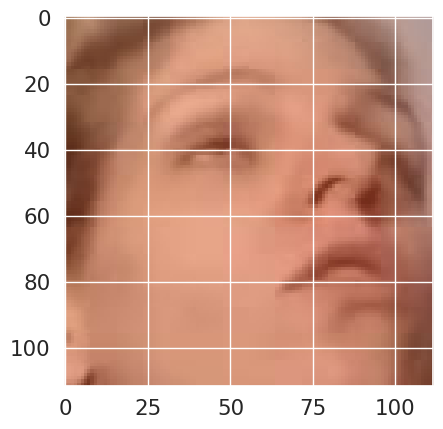

In [ ]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/My Drive/Gobalfff_metadata.csv',names=header_list)
print(labels)

train_folder_path = '/content/drive/My Drive/finalreview_trainvideos'
valid_folder_path = '/content/drive/My Drive/finalreview_testvideos'
train_videos = glob.glob(os.path.join(train_folder_path, '*.mp4'))
valid_videos = glob.glob(os.path.join(valid_folder_path, '*.mp4'))
print("train : " , len(train_videos))
print("test : " , len(valid_videos))


print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/drive/My Drive/finalreview_resnext.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/20] [Batch 96 / 98] [Loss: 0.704430, Acc: 51.29%]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[Epoch 1/20] [Batch 97 / 98] [Loss: 0.703859, Acc: 51.79%]Testing
[Batch 24 / 25]  [Loss: 0.675425, Acc: 55.56%]
Accuracy 55.55555555555556
[Epoch 2/20] [Batch 97 / 98] [Loss: 0.665480, Acc: 59.18%]Testing
[Batch 24 / 25]  [Loss: 0.621577, Acc: 63.64%]
Accuracy 63.63636363636363
[Epoch 3/20] [Batch 97 / 98] [Loss: 0.605343, Acc: 68.11%]Testing
[Batch 24 / 25]  [Loss: 0.537598, Acc: 71.72%]
Accuracy 71.71717171717172
[Epoch 4/20] [Batch 97 / 98] [Loss: 0.506628, Acc: 77.04%]Testing
[Batch 24 / 25]  [Loss: 0.476273, Acc: 76.77%]
Accuracy 76.76767676767676
[Epoch 5/20] [Batch 97 / 98] [Loss: 0.445375, Acc: 83.93%]Testing
[Batch 24 / 25]  [Loss: 0.443458, Acc: 80.81%]
Accuracy 80.8080808080808
[Epoch 6/20] [Batch 97 / 98] [Loss: 0.445236, Acc: 82.65%]Testing
[Batch 24 / 25]  [Loss: 0.481434, Acc: 77.78%]
Accuracy 77.77777777777777
[Epoch 7/20] [Batch 97 / 98] [Loss: 0.434735, Acc: 82.65%]Testing
[Batch 24 / 25]  [Loss: 0.455692, Acc: 81.82%]
Accuracy 81.81818181818181
[Epoch 8/20] [Batch 9

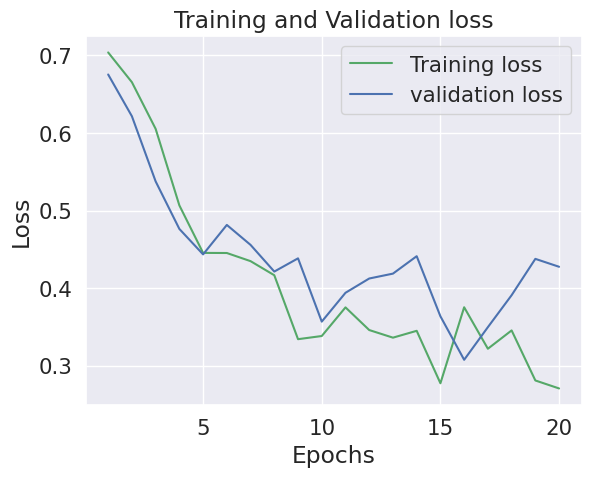

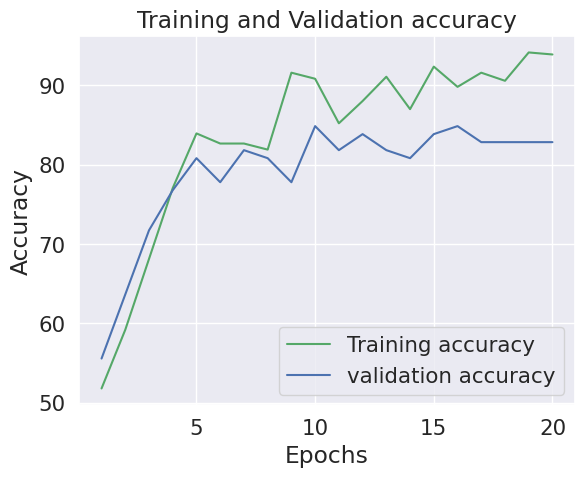

[[44  5]
 [12 38]]
True positive =  44
False positive =  5
False negative =  12
True negative =  38




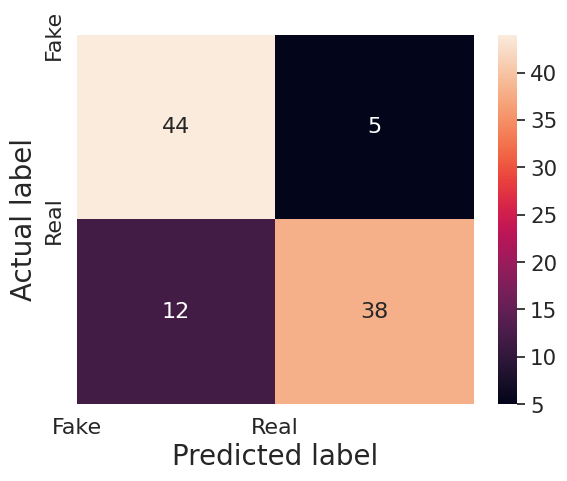

Calculated Accuracy 82.82828282828282


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)